In [25]:
import matplotlib.pyplot as plt  
# iscrtavanje slika i plotova unutar samog browsera
%matplotlib inline 

import matplotlib.pylab as pylab
# prikaz vecih slika 
pylab.rcParams['figure.figsize'] = 21,15

import numpy as np
import cv2 # OpenCV biblioteka

### Pretvaranje slike u sivu i u binarizovanu (crno-bijelu)

In [23]:
img = cv2.imread('images/note/mladjan lovac 2 reda.png')  # ucitavanje slike sa diska

# load from url
import urllib
req = urllib.urlopen('http://wmre.fm/zine/wp-content/uploads/2014/01/OldDesignShop_MusicHomeSweetHome.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr,-1) # 'load it as it is'

# req = urllib.urlopen('https://www.kshs.org/cool3/graphics/sheetmusic4.jpg')
# arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
# img2 = cv2.imdecode(arr,-1) # 'load it as it is'
img2 = cv2.imread('images/Fotkeee/Sa_neta/Presto.jpg')

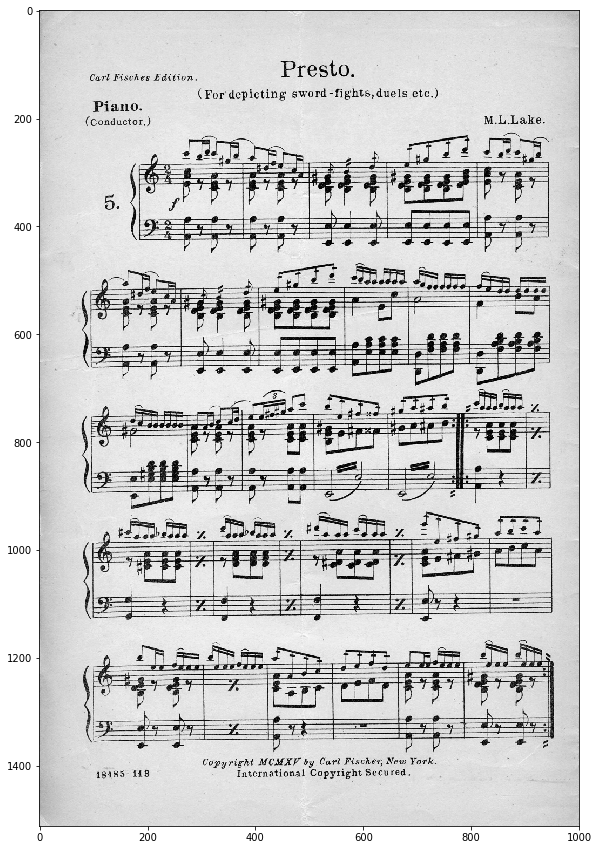

In [24]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)   # -----
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY) # zar ne treba ovdje COLOR_BGR.. jer openCV ucitava kao BGR?
plt.imshow(img_gray, 'gray')
plt.imshow(img_gray2, 'gray', aspect='equal')

# GAUSSIAN
# image_ada_bin = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 15)

# MEAN
image_ada_bin = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 33, 35)
i_a_b_2 = cv2.adaptiveThreshold(img_gray2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 33, 35)
# OTSU
# x, image_ada_bin = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)

# plt.figure()
# plt.imshow(image_ada_bin, 'gray')

# cv2.startWindowThread()
# cv2.namedWindow("preview")
# cv2.imshow("preview", image_ada_bin)
# if cv2.waitKey(): cv2.destroyAllWindows() # important!

cv2.imshow('image', image_ada_bin)
cv2.imshow('image2', i_a_b_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Erozija slike jako sirokim kernelom, za izdvajanje linija  ---  testirati sa fotografijama !!! !!! !!!

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1]]


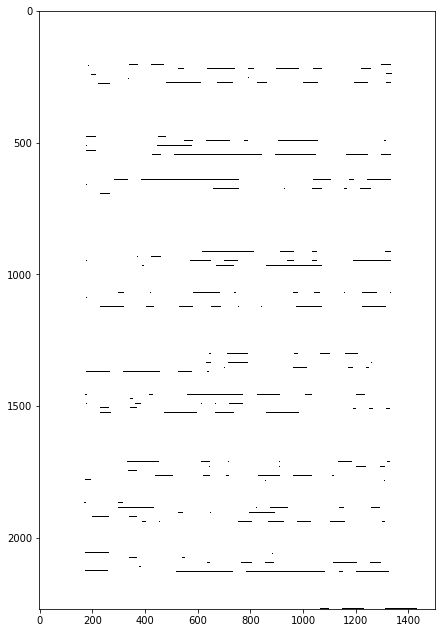

In [16]:
kernel = np.ones((1,50), dtype=np.int);
print kernel
dilated = cv2.dilate(image_ada_bin, kernel, iterations=1)
plt.imshow(dilated, 'gray')

**Prikaz svih piksela sa slike**
- na ekranu,
- u txt fajlu ili
- kroz stampanje slike


<a href="https://stackoverflow.com/questions/15980405/printing-full-contents-of-numpy-array">SO - Printing FULL contents of numpy array [duplicate]</a>

In [17]:
def print_pixels(img):
    for i in xrange(img.shape[0]):
        for j in xrange(img.shape[1]):
            print img[i,j]
def save_pixels(img):
    np.savetxt('_image.txt', img)
def show_array(arr):
    plt.imshow(arr)

In [18]:
# # # # # # # # # #
#    R un         #
#   L ength       #
#  E ncoding      #
# Algotithm which calculates the lenght for runs - arrays of same consecutive elements (pixels in our case)

p = dilated #### less to write !!
p = image_ada_bin

runs = [[1] for x in xrange(p.shape[1])] # each column starts with 1 black pixel

for c in xrange(p.shape[1]): # iterate through all columns
    # start.append(p[0,c]) # memorize the first pixel: black or white
    p[0,c] = 0 # PAINT THE FIRST PIXEL IN PREDEFINED COLOR, to make all columns start the same
    run_index = 0 # start the run
    for r in xrange(1, p.shape[0]): # for each pixel/row in current column
        if (p[r-1 ,c] != p[r, c]):  # if they are not the same,
            run_index += 1          #   --> start next run
            runs[c].append(0)
        runs[c][run_index] += 1     # add a pixel to the current run

# print runs
black_runs = [q[::2] for q in runs]
white_runs = [q[1::2] for q in runs]

## `black_runs` and `white_runs` are not needed - `black_flat` and `white_flat` can be generated with one loop through `runs`
```
def old_black_flat(runs):
    black_runs = [q[::2] for q in runs]
    # black_flat = [] # for run in black_runs: for item in run: black_flat.append(item)
    black_flat = [item for run in black_runs for item in run] # SHORTER flat = [x for sublist in l for x in sublist]
    return black_flat

def old_white_flat(runs):
    white_runs = [q[1::2] for q in runs]
    # white_flat = [] # for run in white_runs: for item in run: white_flat.append(item)
    white_flat = [item for run in white_runs for item in run]
```
Comparison prints:
```
print '_____________________________'
print 'runs_b_flat == thickness_b_flat: ', runs_b_flat == thickness_b_flat
print runs_b_flat[:20]
print '- - - - -'
print thickness_b_flat[:20]
print '========= ========== ========'
print 'runs_w_flat == spacings_w_flat: ', runs_w_flat == spacings_w_flat
print runs_w_flat[:20]
print '- - - - -'
print spacings_w_flat[:20]
print '_____________________________'
```

Compute the staff line thickness and spacing (between the 5 lines in one staff)

In [19]:
black_flat = []
# SHORTER --- flat_list = [item for sublist in l for item in sublist]
for run in black_runs:
    for item in run:
        black_flat.append(item)

from collections import Counter
black_count = Counter(black_flat) # Counter({1: 3, 8: 1, 3: 1, 4: 1, 5: 1})
# print black_count
# print black_count.most_common(2)[0][0] # 1
m_c_black = black_count.most_common(2)
line_height = (m_c_black[0][0] + m_c_black[1][0])/2.
print 'line height:  ', line_height

white_flat = []
for run in white_runs:
    for item in run:
        white_flat.append(item)

white_count = Counter(white_flat)
m_c_white = white_count.most_common(2)
space_height = (m_c_white[0][0] + m_c_white[1][0])/2.
print 'space height: ', space_height

line height:   1.5
space height:  15.5


#### `line_height` and `space_height` contain values of staffline thickness and staffline spacing height.
### We can now use these values to clear all staff lines from the original image.

In [20]:
img = image_ada_bin # less to write

for c in xrange(len(runs)):        # for every column
    cumulative = 0 # initialize the number of passed pixels
    for r in xrange(len(runs[c])): # for every run
        run_length = runs[c][r]
        if (r % 2 == 0): # black runs # every black run longer than 2 * line_height is deleted/whitened
            if (run_length < 2*line_height):
                p[cumulative:cumulative + run_length, c] = [255]*(run_length)
                img[cumulative:cumulative + run_length, c] = [255]*(run_length)
        #else: # white runs
        #    do something maybe ?
        cumulative += run_length

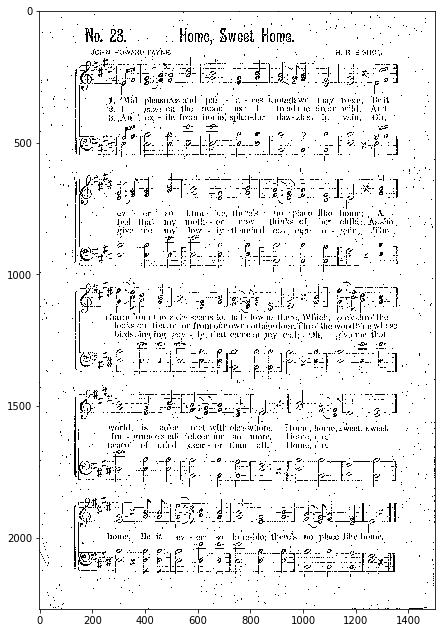

In [21]:
plt.figure()
plt.imshow(img, 'gray')

In [27]:
# a = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
# a[2:5] = [0] * (5-2)
# print a # [1,2,0,0,0,6,7,8...]

# m = [[1,2,3],[4,5,6,-6],[7,8,9],[10,11,12,-12]]
# print [n[1::2] for n in m] # [[2], [5, -6], [8], [11, -12]]